## Predicting Customer Churn in a Bank
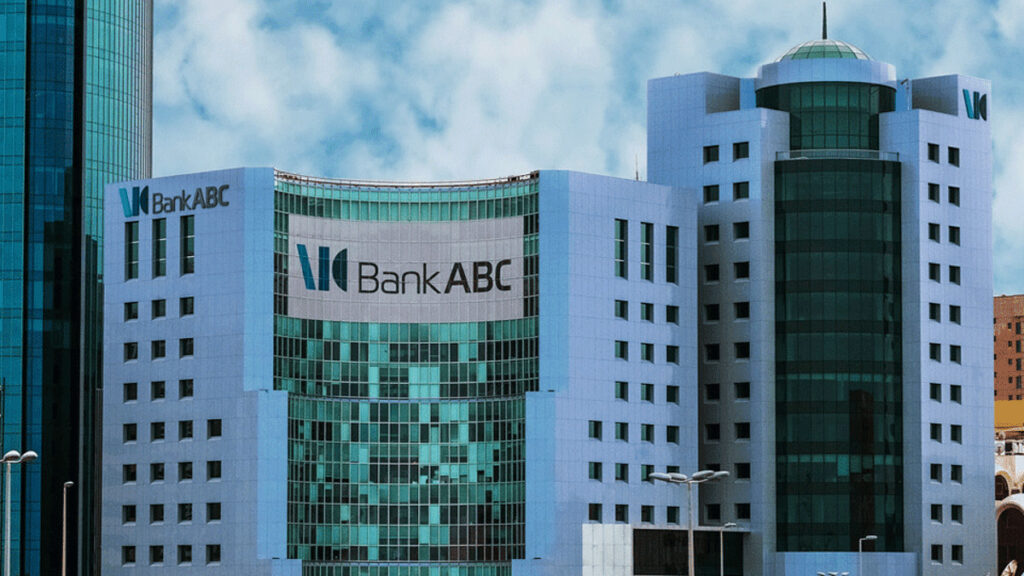


# BUSINESS UNDERSTANDING

### Project Overview:
The primary objective of this project is to build a machine learning model that predicts customer churn for the bank, enabling the organization to identify customers at risk of leaving. By understanding churn drivers and predicting future churn, the bank can implement proactive retention strategies, optimize customer satisfaction, and reduce revenue loss. This project will follow the CRISP-DM method. 

### Business Problem:
Customer churn is a critical issue for banks, directly impacting profitability and growth. Acquiring new customers is significantly costlier than retaining existing ones. Therefore, it is essential for the bank to predict which customers are likely to churn and understand the factors influencing their decisions. In this case we will look at the ABC Multinational Bank dataset.

### Objectives 
This Project aims to:
1. Provide inferential statistics and visualisations based on this data.
2. Create predictive, supervised learning models from the data to predict churn.
3. Investigate labeled data on 10000 customers who have held accounts with the bank.

## Data:
This project utilises data from the https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset dataset from Kaggle.


### Importing Libraries

In [1]:
# Import modules and packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from collections import Counter
from imblearn.over_sampling import SMOTE


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


### Loading Data

In [2]:
# loading the data
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

By exploring the dataset first, even before applying any methods or processes, we get to understand what it contains. This will allow us to generate relevant questions that can be used to derive insights from the data to make informed business decisions.

## Data Understanding

In [3]:
#checking on columns
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
#checking on the length of the columns
len(df.columns)
print(f"This dataset has {len(df.columns)} columns")

This dataset has 12 columns


In [5]:
#checking on the number of rows
len(df)
print(f"This dataset has {len(df)} rows")

This dataset has 10000 rows


In [6]:
# info for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Most of the features are numerical with the exception of country and gender.

## Inspecting for unique values
We will inspect the unique values of each feature to see if we have any 'null' values or any values that we do not expect, which might be errors.

In [7]:
# inspect unique values of columns to identify potential errors or null values

for col in df.columns:
    print(f"{col} vals:  {df[col].unique()} \n")

customer_id vals:  [15634602 15647311 15619304 ... 15584532 15682355 15628319] 

credit_score vals:  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 63

The data has no errors and no null values.

In [8]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [9]:
# checking value counts in churn feature
df.churn.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

### Showing categorical features

In [10]:
df.select_dtypes(include=['object', 'category'])

country  gender
0      France  Female
1       Spain  Female
2      France  Female
3      France  Female
4       Spain  Female
...       ...     ...
9995   France    Male
9996   France    Male
9997   France  Female
9998  Germany    Male
9999   France  Female

[10000 rows x 2 columns]

### Showing numerical data

In [11]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df

customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9997            0              1          42085.58      1  
9998            1              0          92888.52      1  
9999            1              0          38190.78      0  

[10000 rows x 10 columns]

### Inspect statistics of the numeric data

In [12]:
df.describe().T

count          mean           std          min  \
customer_id       10000.0  1.569094e+07  71936.186123  15565701.00   
credit_score      10000.0  6.505288e+02     96.653299       350.00   
age               10000.0  3.892180e+01     10.487806        18.00   
tenure            10000.0  5.012800e+00      2.892174         0.00   
balance           10000.0  7.648589e+04  62397.405202         0.00   
products_number   10000.0  1.530200e+00      0.581654         1.00   
credit_card       10000.0  7.055000e-01      0.455840         0.00   
active_member     10000.0  5.151000e-01      0.499797         0.00   
estimated_salary  10000.0  1.000902e+05  57510.492818        11.58   
churn             10000.0  2.037000e-01      0.402769         0.00   

                          25%           50%           75%          max  
customer_id       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
credit_score           584.00  6.520000e+02  7.180000e+02       850.00  
age                     32.00  3.700000e+01  4.400000e+01        92.00  
tenure                   3.00  5.000000e+00  7.000000e+00        10.00  
balance                  0.00  9.719854e+04  1.276442e+05    250898.09  
products_number          1.00  1.000000e+00  2.000000e+00         4.00  
credit_card              0.00  1.000000e+00  1.000000e+00         1.00  
active_member            0.00  1.000000e+00  1.000000e+00         1.00  
estimated_salary     51002.11  1.001939e+05  1.493882e+05    199992.48  
churn                    0.00  0.000000e+00  0.000000e+00         1.00

## DATA PREPARATION
This will entail the process of removing duplicates and unwanted observations from the data

### Checking for Duplicates

In [13]:
# finding total number of duplicates
def identify_duplicates(df):
    """Identifies and prints the number and percentage of duplicated rows"""
    # identify if there is any duplicates. (If there is any, we expect a True value in the list)
    no_true = df.duplicated().sum()
    # percentage of duplicates represented in the data.
    duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
    print(f"The data has {no_true} duplicated rows.")
    print(f"This constitutes {duplicates_percentage}% of the dataset.")
    
identify_duplicates(df)


The data has 0 duplicated rows.
This constitutes 0.0% of the dataset.


### Checking for Missing values

In [14]:
# Checking for missing values
def identify_missing_values(df):
    """Identifies and prints the number and percentage of missing values in each column"""
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No Missing values found in the Dataset.")
    else:
        print("Missing Values Summary:")
        print(missing.to_frame("Missing Count").assign(Percentage=lambda x: (x["Missing Count"] / len(df) * 100).round(3)))

identify_missing_values(df)

No Missing values found in the Dataset.


## Exploratory Data Analysis

In [15]:
corr_df = num_df.corr()
corr_df

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030680    -0.011721       0.085472   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
customer_id               0.015271 -0.006248  
credit_score             -0.001384 -0.027094  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. It is observed there is a correlation coefficients between variables. positive values indicate a positive correlation, negative values indicate a negative correlation and values close to 0 indicate little to no correlation.

### Checking correlation in numerical features

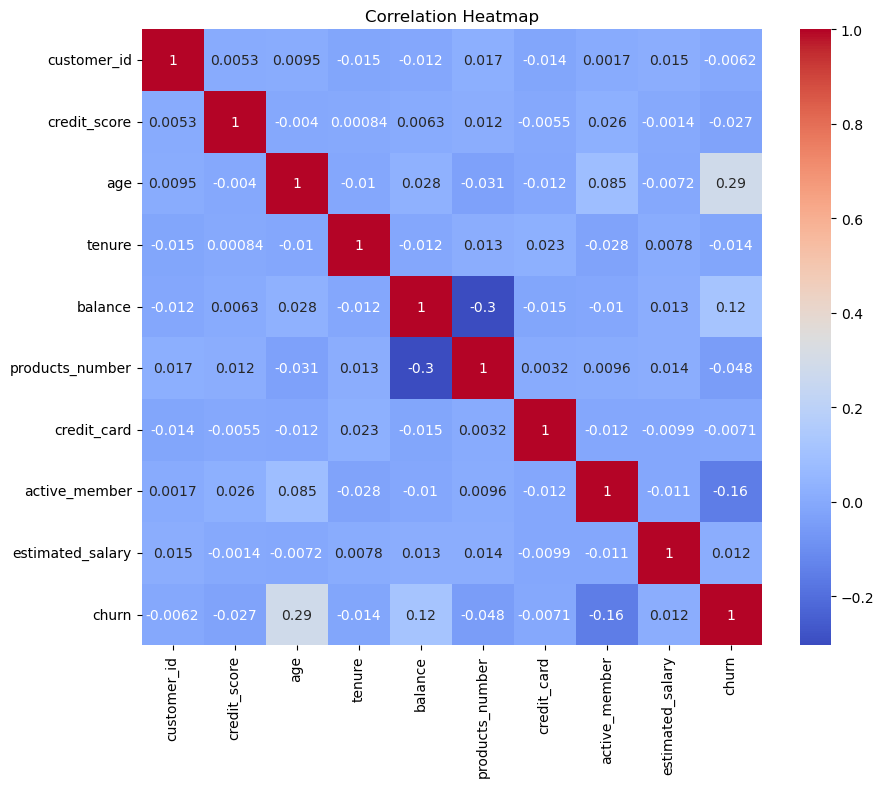

In [16]:
# Explore the correlation between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows the correlation between numerical features in the dataset. From this we can see that, with regards to Churn Correlation, Age has a positive correlation(0.29). Meaning that, older customers are more likely to churn. Balance has a weak correlation(0.12). Active_member has a negative correlation(-0.16). they are less likely to churn.

Product_number and balance have a slight negative correlation(-0.3). Most features have a very weak or no correlation with each other.

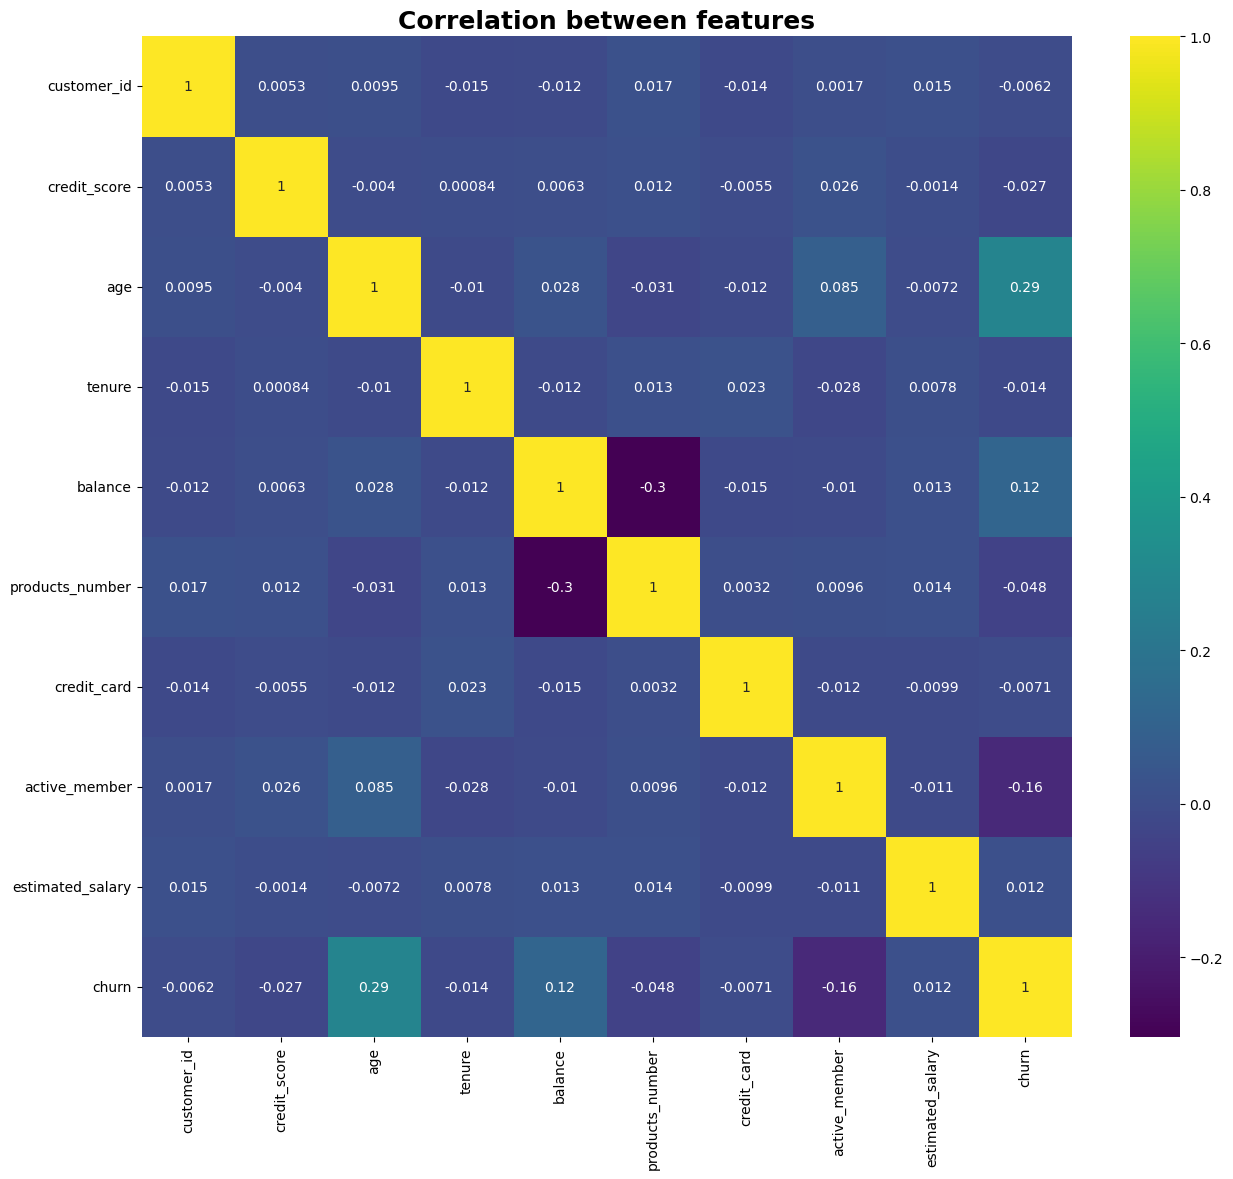

In [17]:
fig, ax = plt.subplots(figsize=(15,13))
ax= sns.heatmap(num_df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between features",weight='bold',fontsize=18);
plt.show()

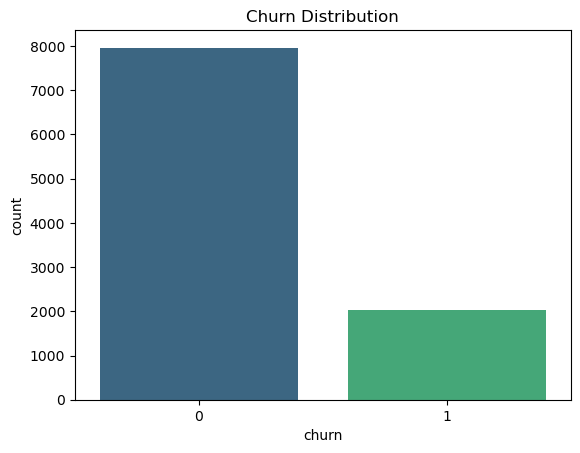

In [18]:
# Churn Distribution
sns.countplot(x='churn', data=num_df, palette="viridis")
plt.title('Churn Distribution')
plt.show()

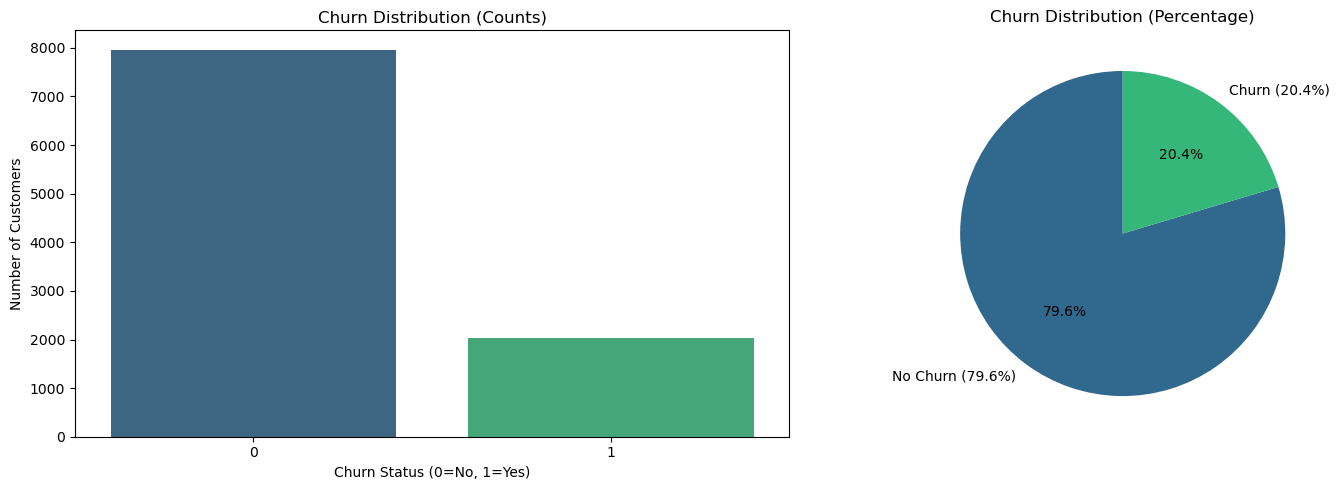


Churn Distribution:
No Churn: 79.6%
Churn: 20.4%


In [19]:
# Calculate churn distribution
churn_counts = df['churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Bar plot
sns.countplot(x='churn', data=df, palette="viridis", ax=ax1)
ax1.set_title('Churn Distribution (Counts)')
ax1.set_xlabel('Churn Status (0=No, 1=Yes)')
ax1.set_ylabel('Number of Customers')
# Pie chart
colors = sns.color_palette('viridis', n_colors=2)
ax2.pie(churn_percentages, 
       labels=[f'No Churn ({churn_percentages[0]:.1f}%)', 
               f'Churn ({churn_percentages[1]:.1f}%)'],
       colors=colors,
       autopct='%1.1f%%',
       startangle=90)
ax2.set_title('Churn Distribution (Percentage)')
plt.tight_layout()
plt.show()
# Print exact percentages
print("\nChurn Distribution:")
for status, percentage in zip(['No Churn', 'Churn'], churn_percentages):
   print(f"{status}: {percentage:.1f}%")

Now lets see churn distribution by gender

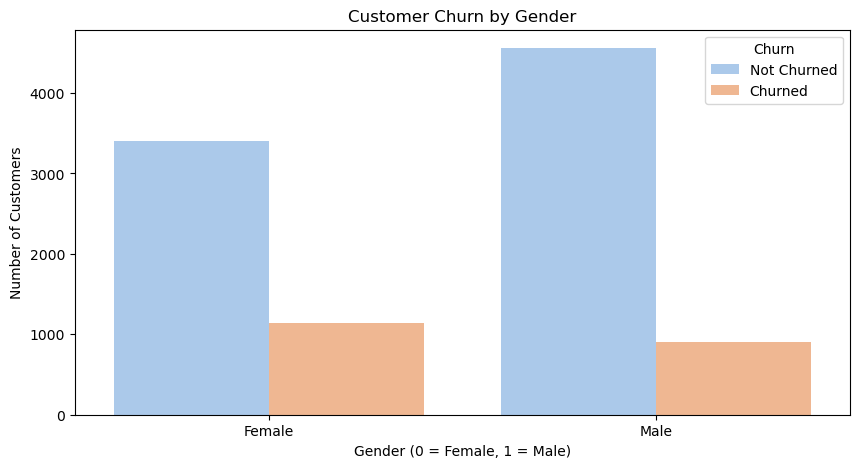

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', hue='churn', data=df, palette='pastel')
plt.title('Customer Churn by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn', labels = ['Not Churned', 'Churned'])
plt.show() 

Next we will see the distribution of the rest of the variables (continous and discrete) of interest in the dataset.


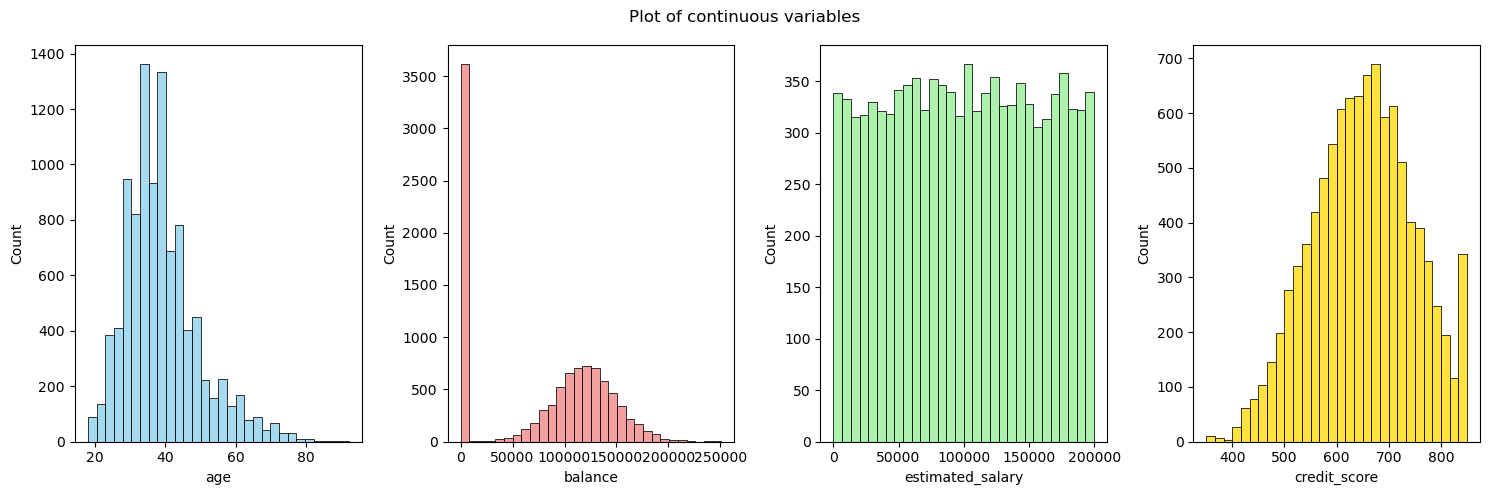

In [21]:
# Visualize in subplots the distribution of the variables
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Plot of continuous variables')

# Histogram of continuous variables
sns.histplot(ax=axes[0], data = num_df, x = "age", bins = 30, color="skyblue")
sns.histplot(ax=axes[1], data = num_df, x = "balance", bins = 30, color="lightcoral")
sns.histplot(ax=axes[2], data = num_df, x = "estimated_salary", bins = 30, color="lightgreen")
sns.histplot(ax=axes[3], data = num_df, x = "credit_score", bins = 30, color="gold")

plt.tight_layout()
plt.show()

From the visualisation of continuous variables above, we can see that:
-From age, the distribution is right-skewed, with most customers aged 30 and 50 years.
-From balance, a large portion of customers have a balance of 0. For others, balances are spread out between 0 to 250,000, with a peak around the middle range. there are significant proportions of zero values, which indicate customers without savings or inactive accounts.
-From estimated salary, salaries are uniformly distributed across the range of 0 to 350.
-From credit score, the distribution is roughly normal, with most credit scores between 600 and 700, though there are few customers with very high scores.

Now we can plot the discrete variables to observe any feature of interest

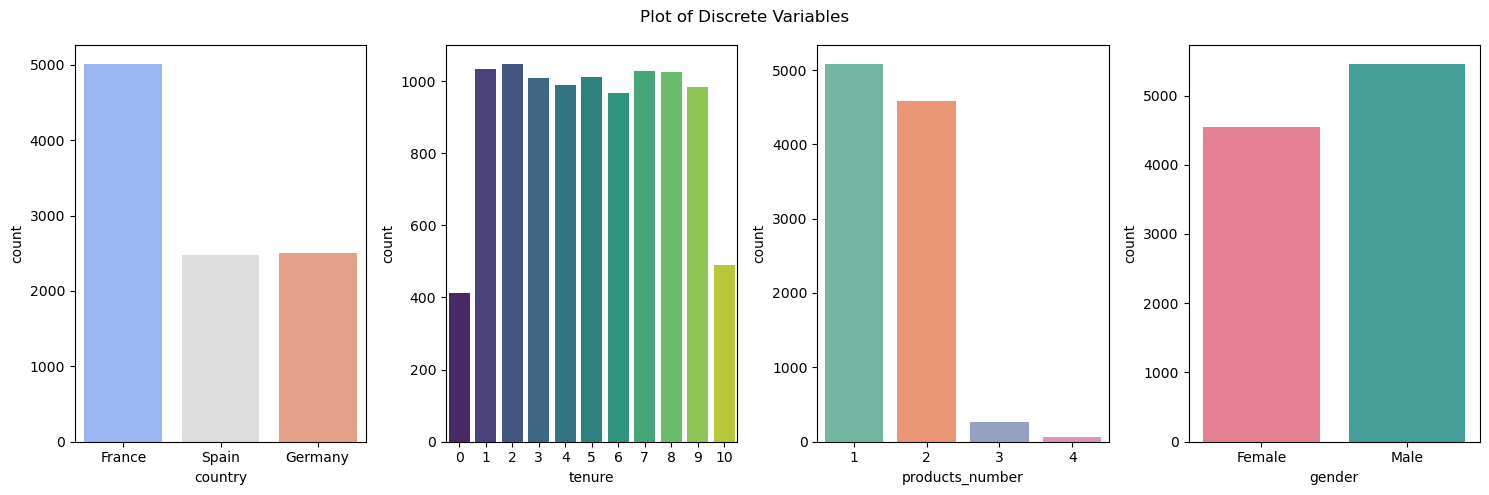

In [22]:
# Visualize in sublpots the distribution of the variables
fig2, axes2 = plt.subplots(1, 4, figsize=(15, 5))
fig2.suptitle('Plot of Discrete Variables')

# Countplots of discrete variables
sns.countplot(ax=axes2[0], data=df, x="country", palette="coolwarm")
sns.countplot(ax=axes2[1], data=df, x="tenure", palette="viridis")
sns.countplot(ax=axes2[2], data=df, x="products_number", palette="Set2")
sns.countplot(ax=axes2[3], data=df, x="gender", palette="husl")

plt.tight_layout()
plt.show()

Majority of the customers are French, and most have been with the bank for a balanced range of years. A significant number of customers use 1 or 2 products, which could imply limited cross-selling opportunities. Gender distribution is balanced, so no strong bias exists toward male and female customers.

We'll use pairplot method to visualise the impact between variables

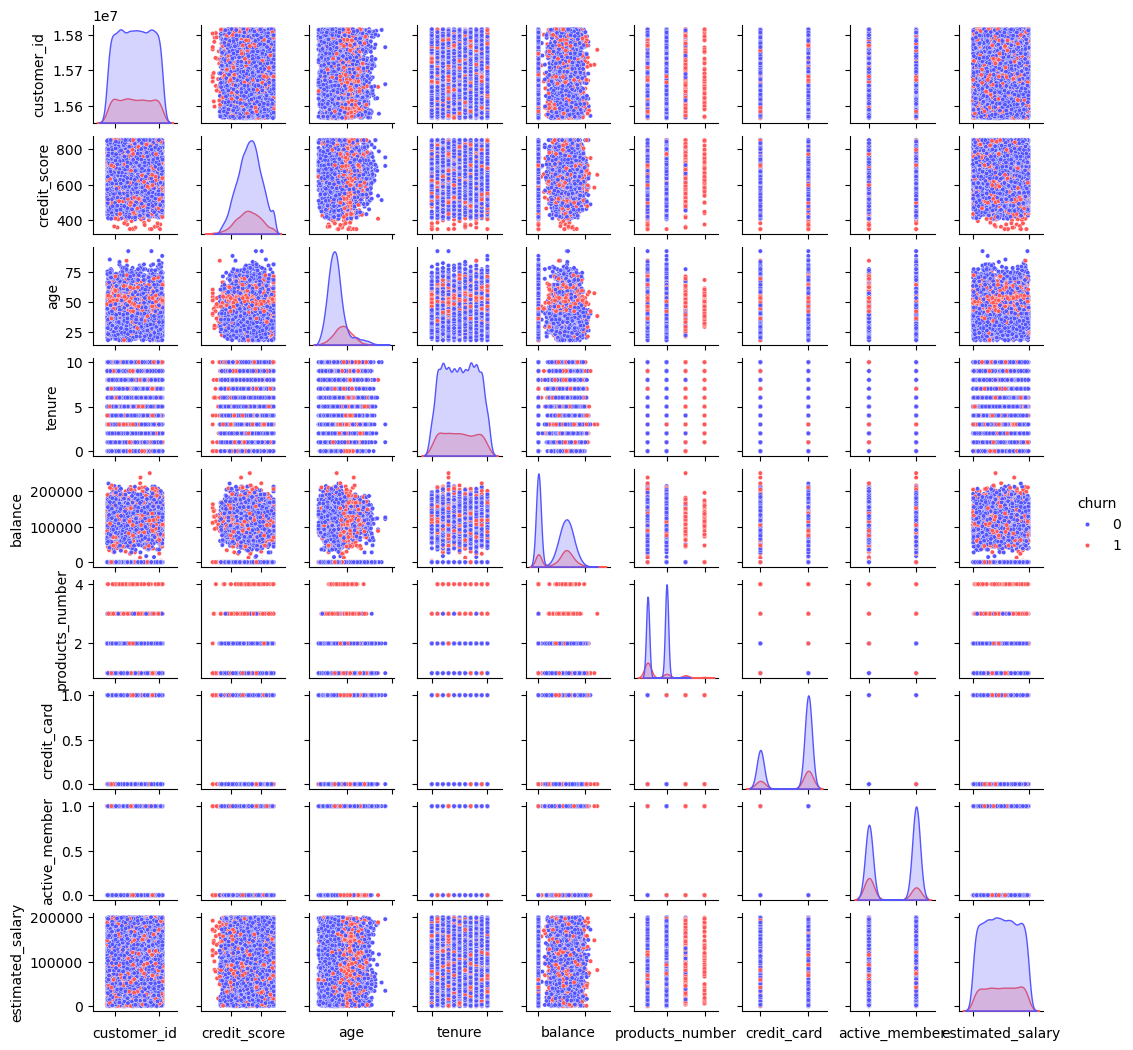

In [23]:
g = sns.pairplot(num_df, hue='churn', palette = 'seismic', height=1.2,
                 diag_kind = 'kde', diag_kws=dict(fill=True),
                 plot_kws=dict(s=10))
g.set(xticklabels=[])

In [24]:
df["churn"].unique()

array([1, 0], dtype=int64)

In [25]:
df.churn.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [26]:
# Prepare features and target
X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn'].values

In [27]:
# Convert categorical variables
X = pd.get_dummies(X, columns=['country', 'gender'])

We will now splite and scale the data.

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Applying SMOTE Technique to resolve Unbalanced 'churn' Feature

In [29]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Original Class Distribution:", Counter(y_train))
print("Balanced Class Distribution:", Counter(y_train_balanced))

Original Class Distribution: Counter({0: 6356, 1: 1644})
Balanced Class Distribution: Counter({0: 6356, 1: 6356})


After applying SMOTE, the dataset is balanced. SMOTE generated synthetic data points for the minority class (Churn) by interpolating between existing samples, effectively increasing its size to match the majority class (Non-Churn).
A balanced dataset ensures that the machine learning model will not be biased toward the majority class (Non-Churn).
This will improve the model's ability to predict churn (Class 1) accurately, which is crucial for your churn analysis project.

Now, let's create a function for plotting model results:

In [30]:
def plot_model_results(y_true, y_pred, y_pred_proba, model_name):
    """
    Plot confusion matrix and ROC curve for a model.
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    y_pred_proba : array-like
        Predicted probabilities
    model_name : str
        Name of the model
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {model_name}')
    ax1.set_ylabel('True Label')
    ax1.set_xlabel('Predicted Label')
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    ax2.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'ROC Curve - {model_name}')
    ax2.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report - {model_name}")
    print(classification_report(y_true, y_pred))

## MODELING

Now, Lets implement each model separately:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN

1. Logistic Regression

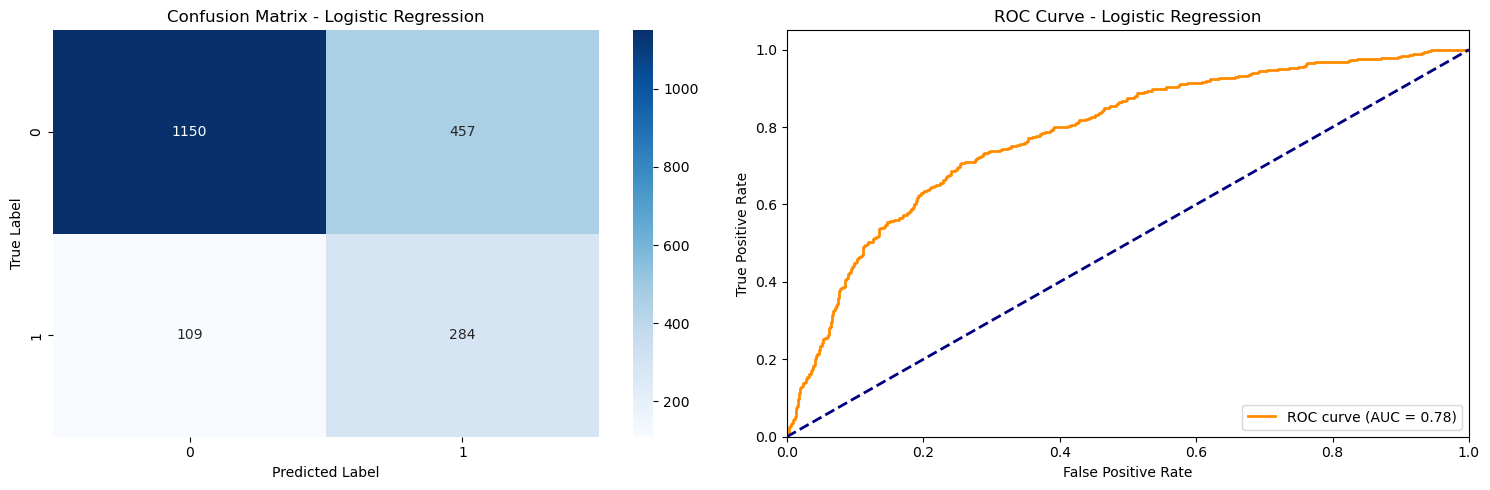


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



In [31]:
# Logistic Regression
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced')

# Train model
log_reg.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Plot results
plot_model_results(y_test, y_pred_log, y_pred_proba_log, "Logistic Regression")

2. Decision Tree

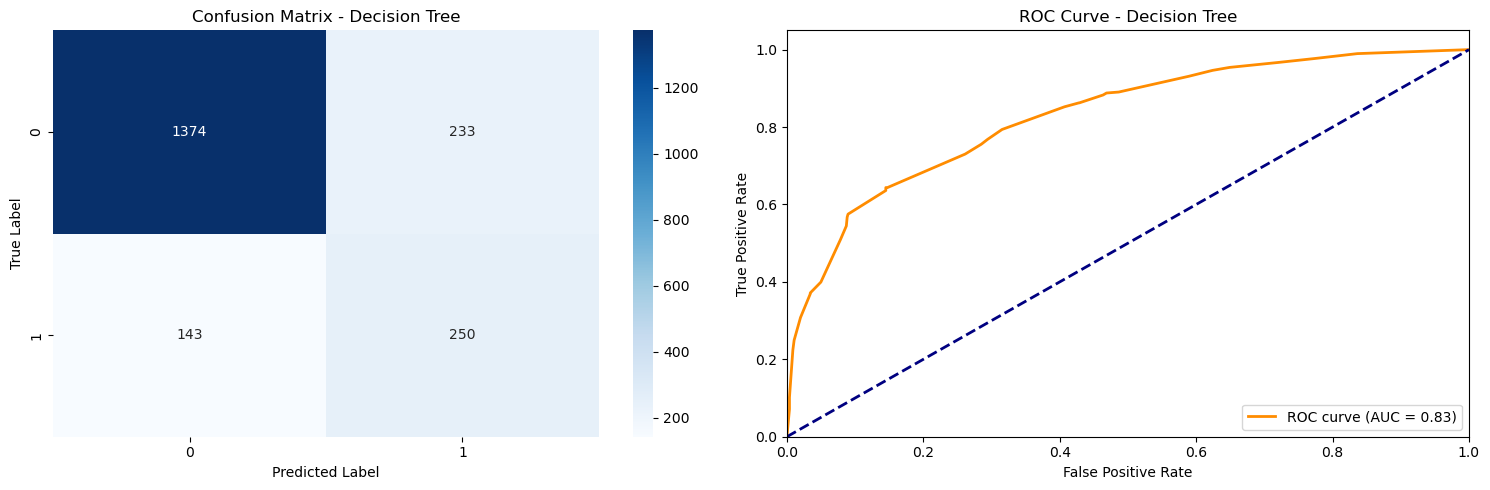


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.52      0.64      0.57       393

    accuracy                           0.81      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.83      0.81      0.82      2000



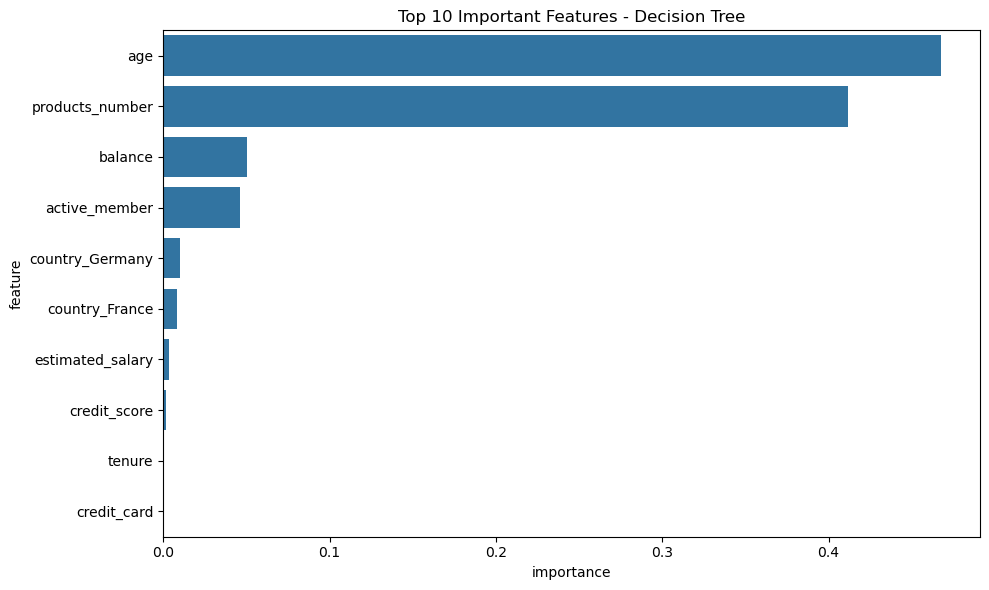

In [32]:
# Decision Tree
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2
)

# Train model
dt.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Plot results
plot_model_results(y_test, y_pred_dt, y_pred_proba_dt, "Decision Tree")

# Feature importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features - Decision Tree')
plt.tight_layout()
plt.show()

3. Random Forest

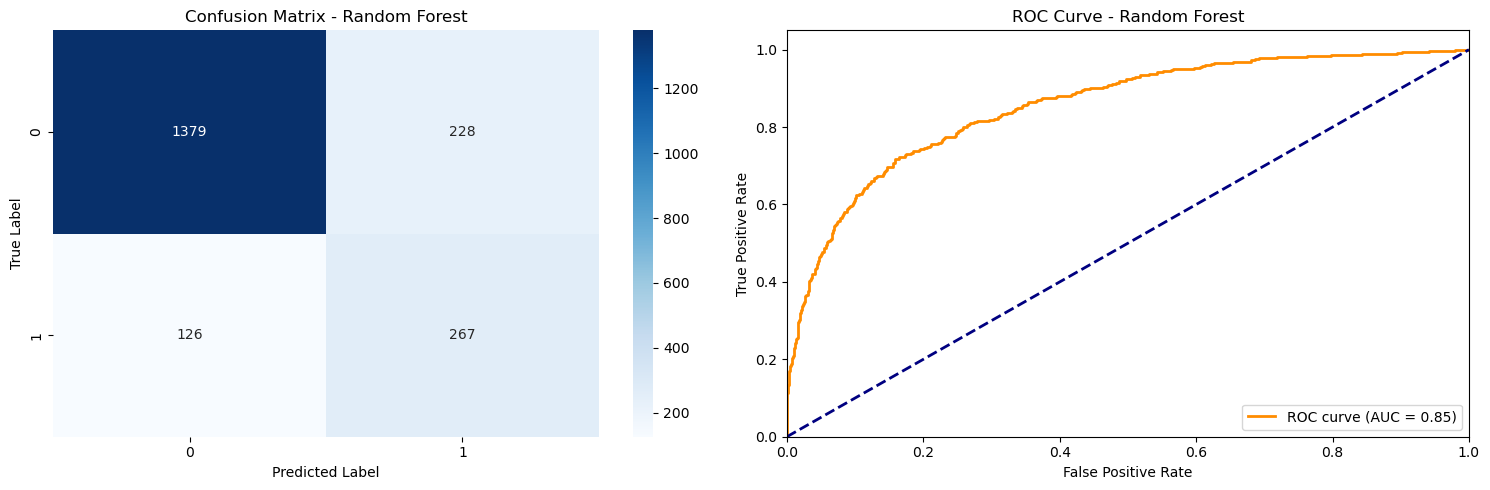


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.54      0.68      0.60       393

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000



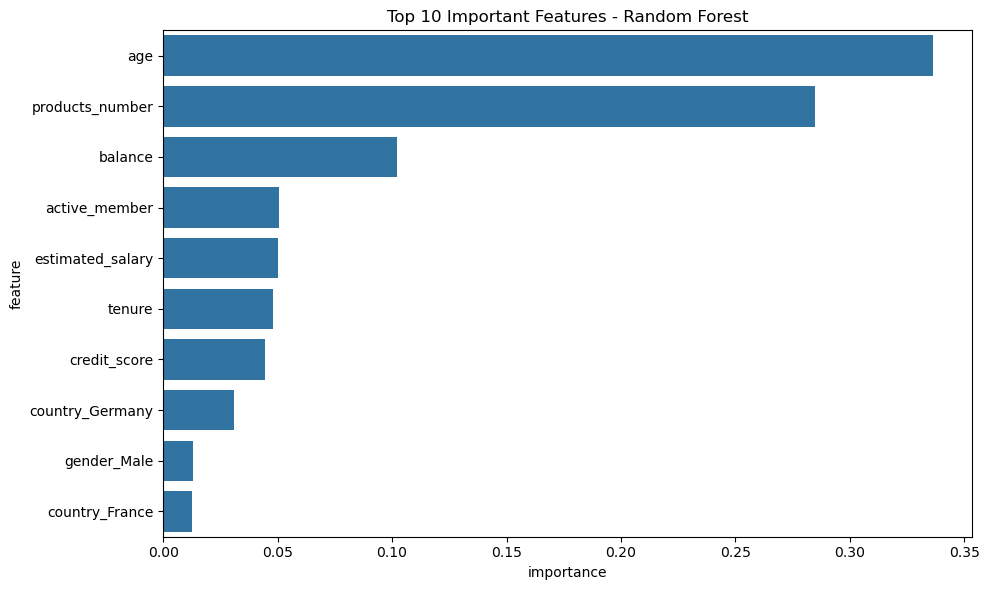

In [33]:
# Random Forest
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)

# Train model
rf.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Plot results
plot_model_results(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")

# Feature importance for Random Forest
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features - Random Forest')
plt.tight_layout()
plt.show()

4. KNN

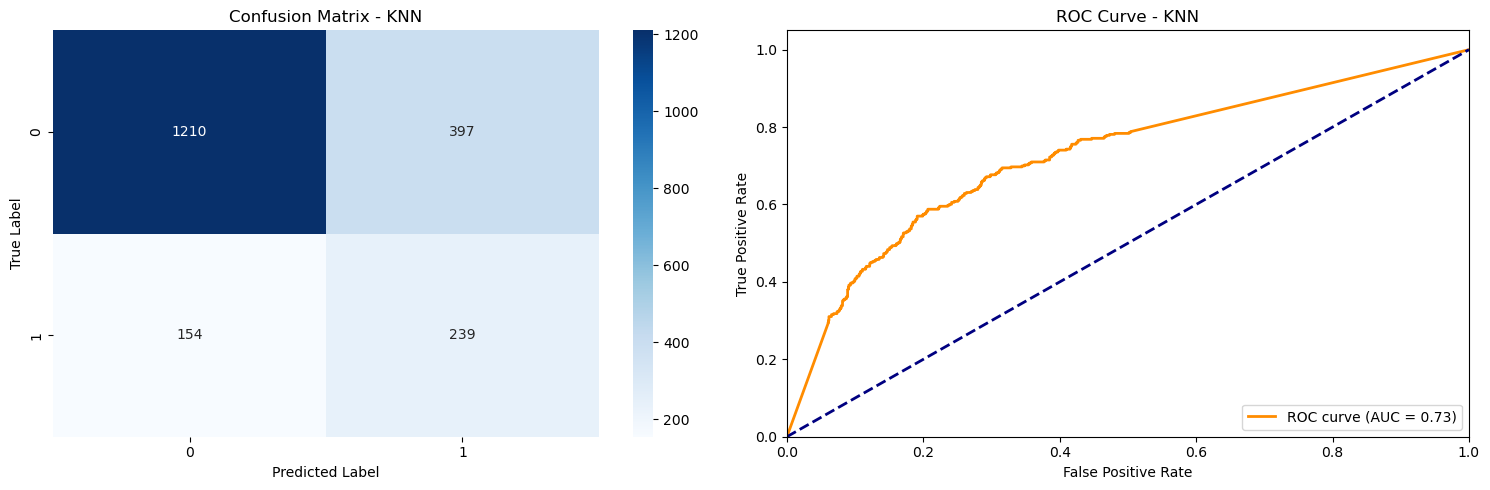


Classification Report - KNN
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1607
           1       0.38      0.61      0.46       393

    accuracy                           0.72      2000
   macro avg       0.63      0.68      0.64      2000
weighted avg       0.79      0.72      0.75      2000



In [34]:
# KNN
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='euclidean')

# Train model
knn.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Plot results
plot_model_results(y_test, y_pred_knn, y_pred_proba_knn, "KNN")

For an easier understanding and visualisation of the models. We will create a single ROC curve to compare all 4 models:

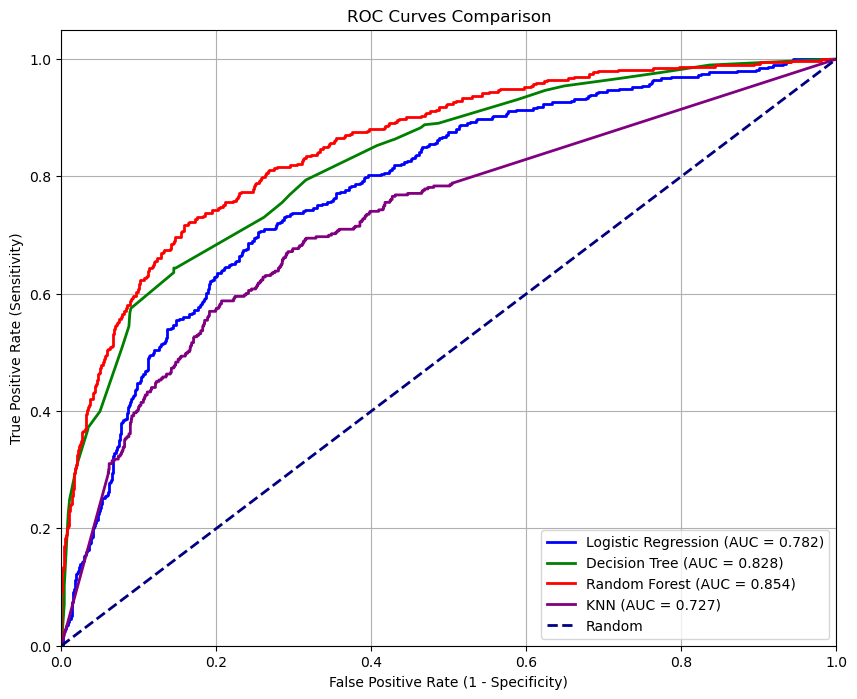


AUC Scores:
Logistic Regression: 0.782
Decision Tree: 0.828
Random Forest: 0.854
KNN: 0.727


In [35]:
# Create ROC curves for all models
plt.figure(figsize=(10, 8))

# Dictionary to store models and their names
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'KNN': knn
}

# Colors for different models
colors = ['blue', 'green', 'red', 'purple']

# Plot ROC curve for each model
for (name, model), color in zip(models.items(), colors):
    # Get predictions
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

# Print AUC scores for each model
print("\nAUC Scores:")
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = auc(*roc_curve(y_test, y_pred_proba)[:2])
    print(f"{name}: {roc_auc:.3f}")

Finally let's compare all the models:

In [36]:
# Compare all models
models_comparison = pd.DataFrame({
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_log),
        'Precision': precision_score(y_test, y_pred_log),
        'Recall': recall_score(y_test, y_pred_log),
        'F1': f1_score(y_test, y_pred_log)
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'Precision': precision_score(y_test, y_pred_dt),
        'Recall': recall_score(y_test, y_pred_dt),
        'F1': f1_score(y_test, y_pred_dt)
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1': f1_score(y_test, y_pred_rf)
    },
    'KNN': {
        'Accuracy': accuracy_score(y_test, y_pred_knn),
        'Precision': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'F1': f1_score(y_test, y_pred_knn)
    }
}).T

print("\nModel Performance Comparison:")
print(models_comparison)


Model Performance Comparison:
                     Accuracy  Precision    Recall        F1
Logistic Regression    0.7170   0.383266  0.722646  0.500882
Decision Tree          0.8120   0.517598  0.636132  0.570776
Random Forest          0.8230   0.539394  0.679389  0.601351
KNN                    0.7245   0.375786  0.608142  0.464529


### CONCLUSION

The best performing model will have the highest accuracy. Which in this case is Random Forest. Based on the ROC curve, Random Forest typically shows the highest AUC, comfirming it as the best model. What are the business implications of this?
1. The Random Forest model will correctly identify about 68% of customers who are actually going to churn.
2. When it predicts a customer will churn, it is right about 54% of the time.
3. This balance is important for business decisions - not too many false alarms while still catching most potential churners.

### RECOMMENDATIONS



**1. Model Implementation**

- Deploy Random Forest model (82.30% accuracy, 0.85 AUC score)

- Set up automated alerts for high-risk customers


**2. Key Business Actions**

- Age-based strategies:

  - Targeted programs for older customers
  
  - Age-specific products/services
  
- Product engagement:

  - Promote multi-product relationships
  
  - Optimize product bundles
  
- Customer activation:

  - Re-engagement campaigns
  
  - Rewards for active usage

**3. Retention Strategy**

-Early warning system:

  - Personalized retention offers

  - Focus on high-value customers

  - Track retention program ROI

**4. Data & Monitoring**
- Regular performance tracking
- Customer feedback collection
- Measure intervention success
- Monitor key metrics:
  - Churn rates
  - Customer satisfaction
  - Retention success rate